## Packages and Assets

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import json
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
test = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')

In [24]:
with open('../../assets/traditional_assets/count_vectorizer_vocab.json', 'r') as f:
    count_vectorizer_vocab = json.load(f)
    count_vectorizer_vocab = dict(count_vectorizer_vocab)

In [25]:
model = pickle.load(open("../../assets/traditional_assets/naive_bayes_model.sav", 'rb'))

## Functions

In [26]:
def viewPredictedRows(X_test, y_test, y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df['correct'] = df['y_test'] == df['y_pred']
    df['correct'] = df['correct'].apply(lambda x: 'Correct' if x else 'Incorrect')
    df['title'] = X_test
    return df


In [27]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

## Predictions

In [28]:
cv = CountVectorizer(ngram_range=(1, 1), vocabulary=count_vectorizer_vocab)
X_test = cv.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())


# cv = CountVectorizer(ngram_range=(1, 1))
# X_test = cv.fit_transform(test['title']).toarray()
# # X_test_names = pd.DataFrame(X_test, columns=cv.get_feature_names_out())
# X_test_names

In [29]:
y_test = test['label']

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       590
           1       0.88      0.87      0.88       623
           2       0.87      0.88      0.87       395
           3       0.67      0.73      0.70       188

    accuracy                           0.85      1796
   macro avg       0.82      0.83      0.83      1796
weighted avg       0.85      0.85      0.85      1796

Confusion Matrix


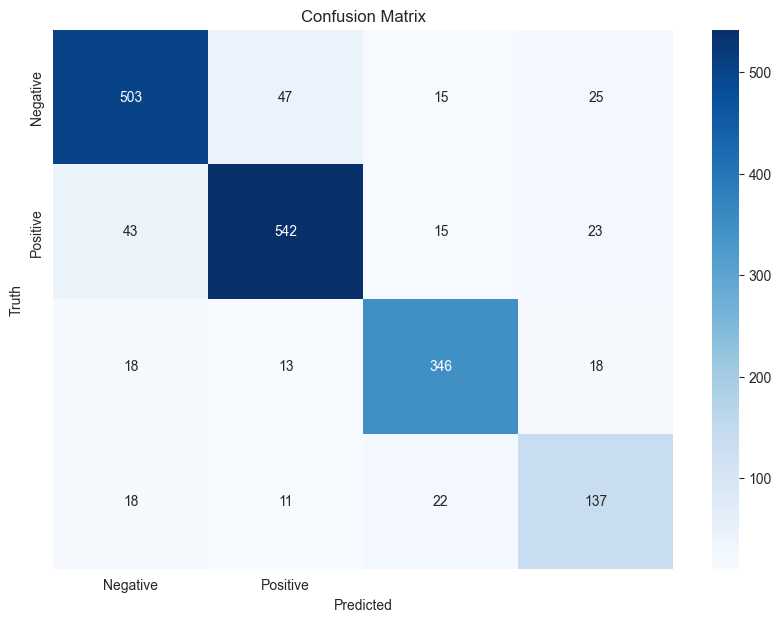

In [30]:



y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [31]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results


,y_test,y_pred,correct,title
0,0,0,Correct,irb brasil irbr3 apresenta representacao crimi...
1,0,0,Correct,titulos indexados tesouro direto apresentam es...
2,1,1,Correct,guide investimentos retira petrobras gerdau it...
3,1,1,Correct,justica extingue acao hipoteca judiciaria prev...
4,0,1,Incorrect,mesmo producao opep queda sauditas batem recorde
...,...,...,...,...
1791,3,3,Correct,metaverso veja <NUM> acoes precisa ter segundo...
1792,1,0,Incorrect,promotores italia pedem donos techint julgados...
1793,2,2,Correct,rali minerio pode esfriar riscos china diz aus...
1794,0,0,Correct,boletim focus mercado reduz previsao pib <NUM>
